In [22]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, Input
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
import matplotlib.pyplot as plt 
from PIL import Image 
%matplotlib inline

## Подготовка данных

In [4]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
x_train_org.shape

(60000, 28, 28)

In [11]:
x_test_org.shape

(10000, 28, 28)

In [5]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train_org[0].shape

(28, 28)

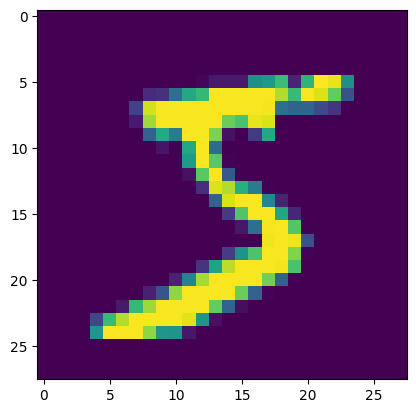

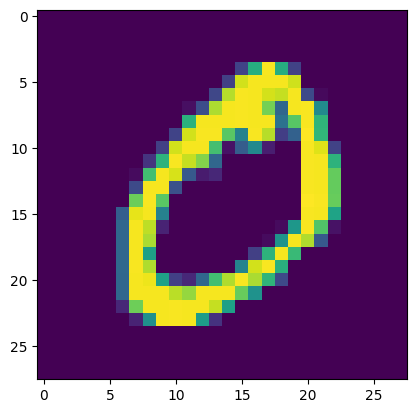

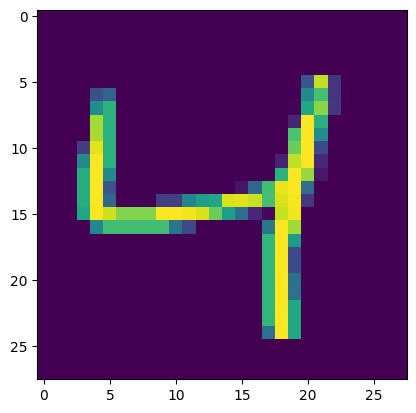

In [8]:
for i in range(3):
    plt.imshow(x_train_org[i], cmap='viridis')
    plt.show()

### Меняем формат входных картинок и нормализуем
Меняем формат входных картинок с 28х28 на 784х1
Преобразовываем в тип float и делим на 255, чтобы диапазон был от 0 до 1

In [12]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [14]:
y_train_org[0]

np.uint8(5)

Нейронная сеть на выходе даёт вектор вероятностей из 10 числел. Чтобы обучать сеть еорректно, нужно преобразовать метки в тоот же формат, в one-hot векторы длиной 10, где 1 стоит на позиции правильного класса.

In [15]:
utils.to_categorical(y_train_org[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Создание нейронной сети

In [24]:
model = Sequential([Input(shape=(784,))]) # Создаем сеть прямого распространения
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучение нейронной сети 

In [28]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9346 - loss: 0.2250 - val_accuracy: 0.9676 - val_loss: 0.1116
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0844 - val_accuracy: 0.9708 - val_loss: 0.0977
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0514 - val_accuracy: 0.9740 - val_loss: 0.0896
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0333 - val_accuracy: 0.9761 - val_loss: 0.0879
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0276 - val_accuracy: 0.9757 - val_loss: 0.0935
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9783 - val_loss: 0.0859
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9927 - loss: 0.0207 - val_accuracy: 0.9740 - val_loss: 0.1078
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.

## Распознание рукописных цифр

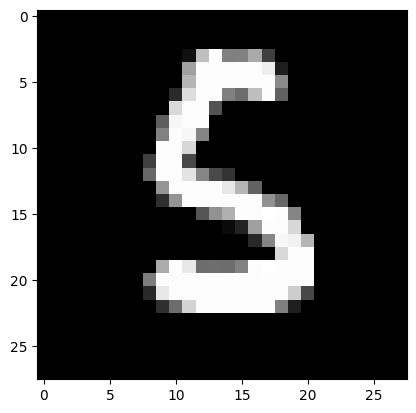

In [30]:
n_rec = 1233
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [31]:
#Выбираем нужную картику из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [32]:
#Добавляем одну размерность в конце, чтобы нейрока могла распознать пример
#Потому что нейросеть принимает именно массив примеров для распознания
#Мы делаем массив из одно примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [33]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [34]:
print(prediction)

[[1.2475378e-24 1.4269305e-16 4.9429661e-22 4.6433823e-10 6.5122172e-23
  1.0000000e+00 6.7404256e-15 1.3568085e-20 2.5303548e-16 9.5732124e-14]]


In [ ]:
#Получим индекс самого большого 